In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import requests
from PIL import Image


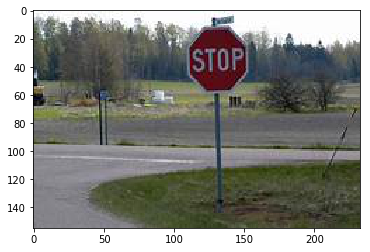

In [4]:
url = 'https://tse3.mm.bing.net/th?id=OIP.1QSfdN519g3SNzXTCohtEQHaE7&pid=Api&P=0&w=233&h=155'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [5]:
%matplotlib inline

In [13]:
image = np.copy(img)

In [14]:
#image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

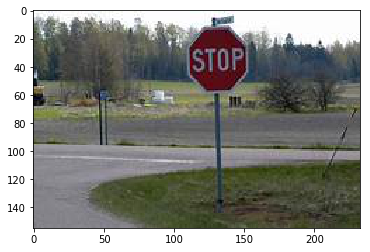

In [15]:
plt.imshow(image)

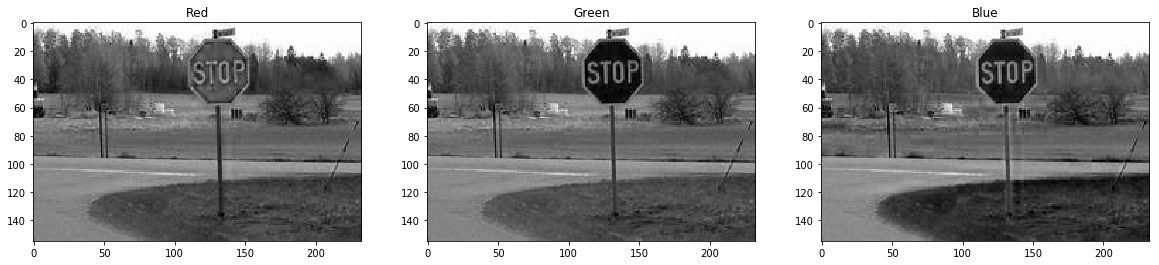

In [16]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

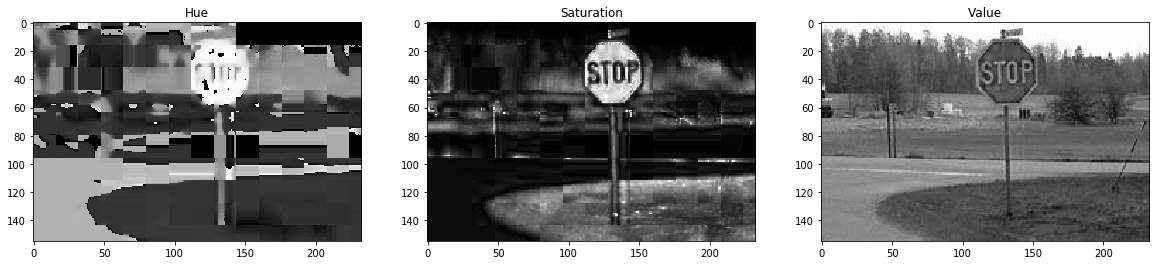

In [18]:
# Convert from RGB to HSV
hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')



In [24]:
# Define our color selection criteria in HSV values
lower_hue = np.array([150,170,70]) 
upper_hue = np.array([255,255,130])

In [25]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

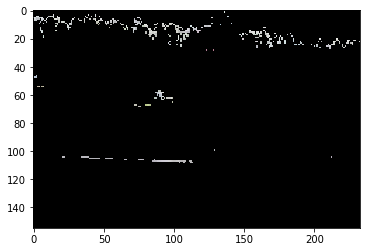

In [26]:
# Define the masked area in RGB space
mask_rgb = cv.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

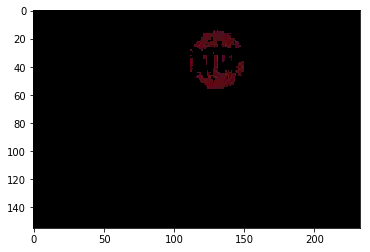

In [27]:
# Define the masked area in HSV space
mask_hsv = cv.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

In [28]:
#hsv masks
mask_1 = cv.inRange(h, 130, 255)
mask_2 = cv.inRange(s, 175, 195)

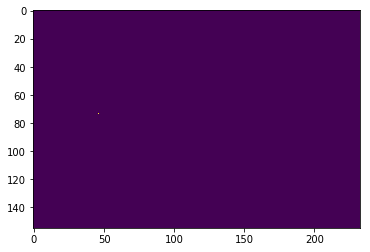

In [32]:
mask_3 = cv.inRange(image,lower_hue,upper_hue )
plt.imshow(mask_3)

In [30]:
# BGR
r_value = 0.2
g_value = -0.4
t = 0.5 * 255
r =  r*r_value
g = g*g_value
mask_4 = np.zeros_like(image[:,:,0])
mask_4[(r + g + b) >= t] = 255

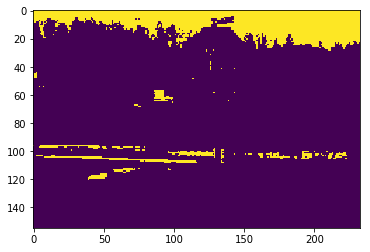

In [31]:
plt.imshow(mask_4)

In [37]:
mask_5 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
mask_5[(mask_5<130) & (mask_5>100)] = 255
   
mask_all = np.zeros_like(mask_1) # Create all black image
mask_all[(mask_1 == 255) | (mask_2 == 255) | (mask_3 == 255) | (mask_4 == 255)] = 255 # Combine 2 images
mask_all[mask_5==255] = 0
kernel = np.ones((7,7), np.uint8)
mask_all = cv.dilate(mask_all, kernel, 4)

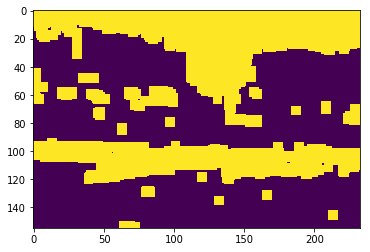

In [38]:
plt.imshow(mask_all)